<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Performing_K-Nearest-Neighbors_and_Naive_Bayes_Classification_using_Scikit-learn/blob/master/Week9_IP_Precy_Mae_(Dataset_1_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Titanic Dataset using K Nearest Neighbor


---




# **1. Defining the Question**

# **2. Data cleaning and preparation**

## Loading libraries and dataset

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [138]:
train= pd.read_csv('/content/train (5).csv')
test= pd.read_csv('/content/test (1) (1).csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [139]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Checking our datasets

In [140]:
# Shape of dataset
print("train rows and columns",train.shape)
print("test rows and columns",test.shape)

train rows and columns (891, 12)
test rows and columns (418, 11)


In [141]:
# Checking our column datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [142]:
# Changing the column datatypes (object) of the data we'll be using into category
train['Name'] = train.Name.astype('category')
train['Sex'] = train.Sex.astype('category')
train['Ticket'] = train.Ticket.astype('category')
train['Cabin'] = train.Cabin.astype('category')
train['Survived'] = train.Survived.astype('category')
train['Embarked'] = train.Embarked.astype('category')
train.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

Our categorical features are now in category form

## Dealing with missing data


In [143]:
# Checking for missing data
print("Missing values in train")
print("")
print(train.isnull().sum())
# 
print("")
print("Missing values in test")
print("")
print(test.isnull().sum())

Missing values in train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are missing values in Fare, Cabin, age and embarked

In [144]:
# Filling missing values in train dataset
#
# Filling missing values in age with the mean
train['Age']=train['Age'].fillna(train['Age'].mean())
#
# Filling missing values in cabin with the 
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode().iloc[0])
#
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode().iloc[0])


In [145]:
# Filling missing values in test dataset

# Filling missing values in age with the mean
test['Age']=test['Age'].fillna(test['Age'].mean())
#
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
#
# Filling missing values in cabin with the mode
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode().iloc[0])

In [146]:
# Confirming that our null valeus are replaced 
print("Missing values in train")
print("")
print(train.isnull().sum())
# 
print("")
print("Missing values in test")
print("")
print(test.isnull().sum())

Missing values in train

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Missing values in test

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


We have dealt with missing values in our datasets

In [147]:
# Data cleaning procedures, fixing column names
#
train.columns= train.columns.str.strip().str.lower().str.replace(' ','_')
train.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Our columns names are now in lowercase[link text](https://)

In [148]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

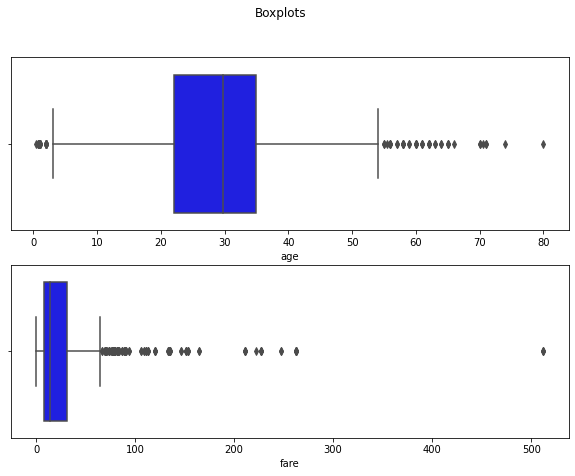

In [149]:
# Checking for outliers
fig, ((ax1),(ax2)) = plt.subplots(2 ,figsize=(10, 7))
fig.suptitle('Boxplots')
print('\n')
sns.boxplot(train['age'], ax=ax1, color='blue')
sns.boxplot(train['fare'], ax=ax2, color='blue')


plt.show()

In [150]:
# Removing outliers
plt.figure(figsize=(12,6))
sns.boxplot(normal[(normal >= fence_low) & (normal <= fence_high)])

# **3. Perform EDA**

# **4. Splitting dataset** 

## Splitting dataset

In [151]:
# Dropping irrelevant columns
train.drop(['name', 'passengerid','ticket'], axis = 1, inplace= True) 

In [152]:
# Scaling our numerical features to a standard normal distribution
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['age','fare']

train[columns_to_scale]= StandardScaler.fit_transform(train[columns_to_scale])
train.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,-0.592481,1,0,-0.502445,B96 B98,S
1,1,1,female,0.638789,1,0,0.786845,C85,C


In [163]:
# Splitting our dataset
X=train.loc[:, train.columns != 'survived'] # Independent variables

y= train.iloc[:, train.columns == 'survived'] # Dependent variable


## Get dummies

In [164]:
 # Converting categorical columns to binary
cat_columns=['age','sex','cabin','embarked','survived']
# Import label encoder
 from sklearn.preprocessing import LabelEncoder
 lbl_encoders={}
 for column in cat_columns:
   lbl_encoders[column]=LabelEncoder()
   train[column]= lbl_encoders[column].fit_transform(train[column])

# **5. Modelling**

## Base model

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [166]:
# Importing and running our model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [167]:
# Fitting our model
knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [168]:
# Predictions
predict = knn.predict(X_test)

In [169]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.7262569832402235


In [170]:
# Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predict))

[[93 17]
 [32 37]]


## Improving perfomance

In [171]:
# Improving our model using  LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
# Importing and running our model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [179]:
# Fitting our model
KNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [180]:
# Predictions
p = KNN.predict(X_test)

In [181]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, p))

Accuracy: 0.7541899441340782


# **6. Testing the model**

# **7. Conclusion** 

# **8. Challenging the Solution**